In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
data_set = pd.read_csv('../data/cleaned_spellings_Restaurant_reviews.csv')

In [146]:
data_set.head()

,Unnamed: 0,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,cleaned_text
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0,ambience good food quite good saturday lunch c...
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,ambience good pleasant even service prompt foo...
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,must try great food great ambience thanx servi...
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,da arun great guy behavior sincerely good food...
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,food goodbye order koi drumstick basket mutton...


In [147]:
data_set = data_set.drop("Unnamed: 0", axis=1)

In [148]:
data_set.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,cleaned_text
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,ambience good pleasant even service prompt foo...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,must try great food great ambience thanx servi...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,da arun great guy behavior sincerely good food...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,food goodbye order koi drumstick basket mutton...


In [149]:
print(f"Shape: {data_set.shape}")
print('number of NA values: ', data_set.isna().sum())


Shape: (10000, 9)
number of NA values:  Restaurant         0
Reviewer          38
Review            45
Rating            38
Metadata          38
Time              38
Pictures           0
7514            9999
cleaned_text      68
dtype: int64


It can be seen here that there are 68 blanks in our clean text, which means that their rating does not have any effect, so I choose to clear 68 lines

In [150]:
data_set = data_set.dropna(subset=["cleaned_text"])
data_set = data_set.drop("7514", axis=1)
print(f"Shape after removing rows with NaN in 'cleaned_text': {data_set.shape}")
print('Number of NA values after removal: ', data_set.isna().sum())

Shape after removing rows with NaN in 'cleaned_text': (9932, 8)
Number of NA values after removal:  Restaurant      0
Reviewer        0
Review          0
Rating          0
Metadata        0
Time            0
Pictures        0
cleaned_text    0
dtype: int64


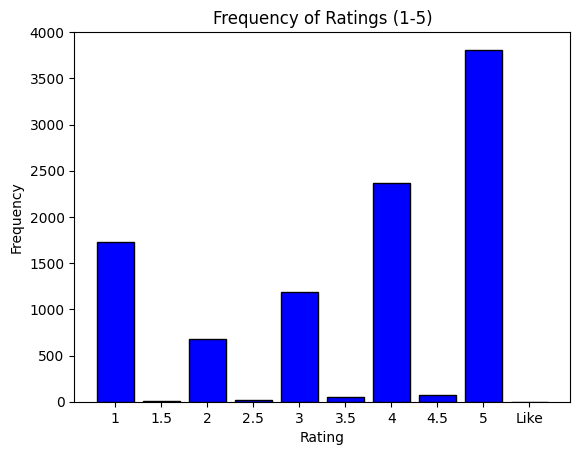

In [151]:
rating_counts = data_set["Rating"].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='blue', edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings (1-5)")
plt.xticks(rating_counts.index)
plt.show()

In [152]:
print(data_set["Rating"].dtype)

object


What I can see here is that our clean text contains 1.5, 2.5, 3.5, 4.5 and like, but it appears so infrequently that we can ignore it

In [153]:
data_set["Rating"] = pd.to_numeric(data_set["Rating"], errors="coerce")
data_set = data_set.dropna(subset=["Rating"])

In [154]:
print(data_set["Rating"].dtype)

float64


/var/folders/x_/d_z7v72s0775nsvt3qttmwj80000gn/T/ipykernel_83098/1830135537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = df["Rating"].astype(int)


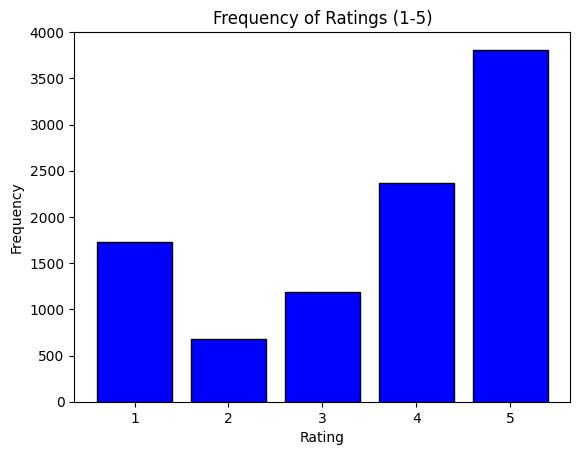

In [155]:
df = data_set[data_set["Rating"].isin([1, 2, 3, 4, 5])]
df["Rating"] = df["Rating"].astype(int)
rating_counts = df["Rating"].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='blue', edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings (1-5)")
plt.xticks(rating_counts.index)
plt.show()

In [156]:
n_words = df['cleaned_text'].str.split().str.len()
n_chars = df['cleaned_text'].str.len()

In [157]:
pd.DataFrame(n_words.describe())

,cleaned_text
count,9787.000000
mean,27.634209
std,32.790569
min,1.000000
25%,14.000000
50%,19.000000
75%,31.000000
max,534.000000


/var/folders/x_/d_z7v72s0775nsvt3qttmwj80000gn/T/ipykernel_83098/3732223183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TextLength'] = df['cleaned_text'].apply(len)


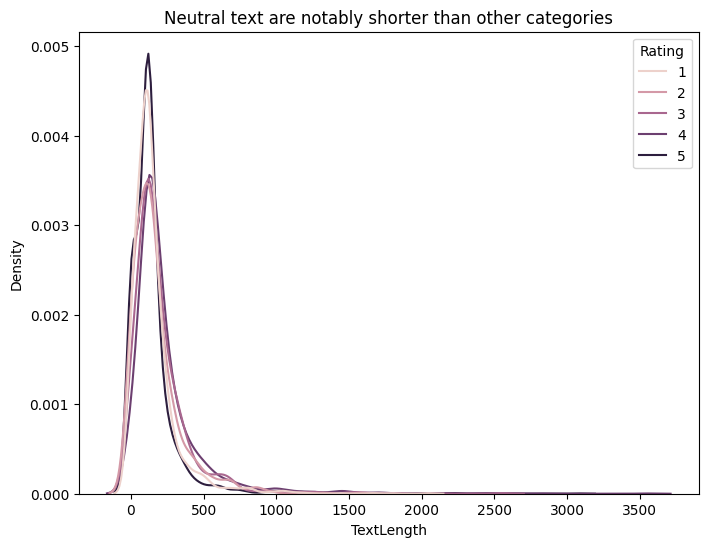

In [158]:
plt.figure(figsize=(8,6))

df['TextLength'] = df['cleaned_text'].apply(len)

sns.kdeplot(data=df, x='TextLength', hue="Rating" ,common_norm = False)

plt.title("Neutral text are notably shorter than other categories")
plt.show()

What I can see here is that all of our texts, both good and bad, are about 100 in length

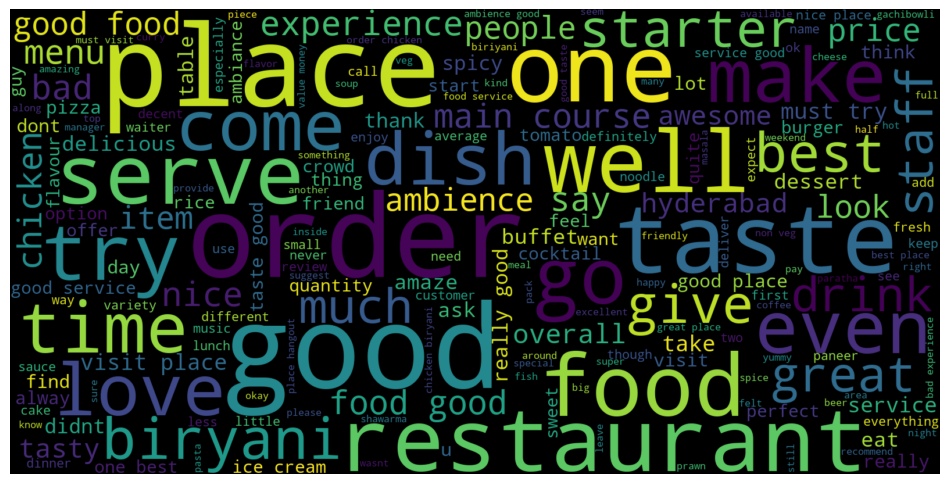

In [159]:
# display the 50 words the most used in the reviews
from collections import Counter
from wordcloud import WordCloud
Counter(" ".join(df["cleaned_text"]).split()).most_common(50)
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(" ".join(df["cleaned_text"]))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From the word cloud, we have a lot of positive words: "good," "love," "well" on the other way we notice "bad" that describe a negative review. these particular words will probably ne really  usefull for the classification of a review.
Some words that are actually used may indicate something that is really important to the customer, for example: "order", "place", "taste". We can imagine that ratings are likely to be good when these words are used alongside the positive words we've discussed.

In [160]:
df.to_csv("complete_cleaned_spellings_Restaurant_reviews.csv")